In [36]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

In [38]:
from torchsummary import summary
import torch
use_cuda=torch.cuda.is_available()
import pytorch
from pytorch import dataset as ptd

import os
import datasets
import pytorch_models
import torch.optim as optim
dataset_name="cifar10"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset_name)
dataset=ptd.ClassificationDataset(dataset_name,x_train,x_test,y_train,y_test,num_classes,input_shape)

print('x_train shape:', x_train.shape,x_train.dtype)
print('x_test shape:', x_test.shape,x_test.dtype)
print('y_train shape:', y_train.shape,y_train.dtype)
print('y_test shape:', y_test.shape,y_test.dtype)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


import numpy as np
print(np.unique(y_train.argmax(axis=1)))
print(y_train.min(),y_train.max())


x_train shape: (50000, 32, 32, 3) uint8
x_test shape: (10000, 32, 32, 3) uint8
y_train shape: (50000, 10) float64
y_test shape: (10000, 10) float64
50000 train samples
10000 test samples
[0 1 2 3 4 5 6 7 8 9]
0.0 1.0


In [39]:
from pytorch import training

import pytorch_models

conv_filters={"mnist":32,"mnist_rot":32,"cifar10":64,"fashion_mnist":64,"lsa16":32}
fc_filters={"mnist":64,"mnist_rot":64,"cifar10":128,"fashion_mnist":128,"lsa16":64}
model = pytorch_models.SimpleConv(input_shape,num_classes,
                                 conv_filters=conv_filters[dataset.name],fc_filters=fc_filters[dataset.name])
#model= pytorch_models.FFNet(input_shape,num_classes)x
if use_cuda:
    model=model.cuda()
parameters=training.add_weight_decay(model.named_parameters(),1e-9)
optimizer = optim.Adam(parameters, lr=0.001)
print(model)

rotated_model= pytorch_models.SimpleConv(input_shape,num_classes,
                                       conv_filters=conv_filters[dataset.name],fc_filters=fc_filters[dataset.name])
if use_cuda:
    rotated_model= rotated_model.cuda()
rotated_parameters=training.add_weight_decay(rotated_model.named_parameters(),1e-9)
rotated_optimizer = optim.Adam(rotated_parameters, lr=0.001)

print(rotated_model)
#summary(model, input_size=[1,28,28])


SimpleConv(
  (conv): SequentialWithIntermediates(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
  )
  (fc): SequentialWithIntermediates(
    (0): Linear(in_features=16384, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)
SimpleConv(
  (conv): SequentialWithIntermediates(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1)

Training model with unrotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   1.31, accuracy:  0.525, Time:  0:00:16


Test => Loss: 0.9879, Accuracy: 65.25% (6525/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:  0.806, accuracy:  0.718, Time:  0:00:16


Test => Loss: 0.7631, Accuracy: 73.13% (7313/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:  0.606, accuracy:  0.789, Time:  0:00:16


Test => Loss: 0.7330, Accuracy: 75.34% (7534/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:  0.454, accuracy:  0.839, Time:  0:00:16


Test => Loss: 0.7145, Accuracy: 77.54% (7754/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:  0.325, accuracy:  0.886, Time:  0:00:16


Test => Loss: 0.7188, Accuracy: 78.03% (7803/10000)


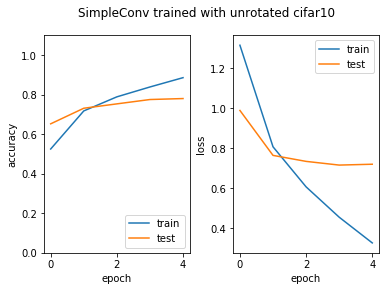

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   1.86, accuracy:   0.31, Time:  0:00:13


Test => Loss: 1.6589, Accuracy: 39.19% (3919/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   1.57, accuracy:  0.427, Time:  0:00:12


Test => Loss: 1.4941, Accuracy: 45.36% (4536/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:   1.44, accuracy:  0.477, Time:  0:00:12


Test => Loss: 1.3694, Accuracy: 50.32% (5032/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:   1.36, accuracy:  0.513, Time:  0:00:12


Test => Loss: 1.3126, Accuracy: 52.79% (5279/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:   1.28, accuracy:  0.544, Time:  0:00:12


Test => Loss: 1.2938, Accuracy: 53.99% (5399/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:   1.22, accuracy:  0.566, Time:  0:00:13


Test => Loss: 1.2322, Accuracy: 56.13% (5613/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:   1.18, accuracy:   0.58, Time:  0:00:13


Test => Loss: 1.1660, Accuracy: 58.52% (5852/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:   1.14, accuracy:  0.593, Time:  0:00:12


Test => Loss: 1.1540, Accuracy: 59.46% (5946/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:    1.1, accuracy:  0.609, Time:  0:00:13


Test => Loss: 1.1372, Accuracy: 60.17% (6017/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:   1.08, accuracy:  0.617, Time:  0:00:12


Test => Loss: 1.1102, Accuracy: 61.16% (6116/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:   1.06, accuracy:  0.624, Time:  0:00:12


Test => Loss: 1.0911, Accuracy: 61.35% (6135/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:   1.03, accuracy:  0.635, Time:  0:00:13


Test => Loss: 1.0953, Accuracy: 61.84% (6184/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:   1.02, accuracy:  0.637, Time:  0:00:13


Test => Loss: 1.0707, Accuracy: 62.22% (6222/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:  0.997, accuracy:  0.649, Time:  0:00:13


Test => Loss: 1.0606, Accuracy: 63.19% (6319/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:  0.987, accuracy:   0.65, Time:  0:00:12


Test => Loss: 1.0389, Accuracy: 63.83% (6383/10000)


Epoch 16: 100% (batch 782/782)  ==stats==> loss:  0.968, accuracy:  0.659, Time:  0:00:10


Test => Loss: 1.0432, Accuracy: 63.34% (6334/10000)


Epoch 17: 100% (batch 782/782)  ==stats==> loss:  0.951, accuracy:  0.666, Time:  0:00:10


Test => Loss: 1.0512, Accuracy: 63.58% (6358/10000)


Epoch 18: 100% (batch 782/782)  ==stats==> loss:  0.937, accuracy:   0.67, Time:  0:00:10


Test => Loss: 1.0058, Accuracy: 65.09% (6509/10000)


Epoch 19: 100% (batch 782/782)  ==stats==> loss:  0.935, accuracy:   0.67, Time:  0:00:10


Test => Loss: 0.9865, Accuracy: 65.63% (6563/10000)


Epoch 20: 100% (batch 782/782)  ==stats==> loss:  0.919, accuracy:  0.678, Time:  0:00:10


Test => Loss: 1.0242, Accuracy: 64.19% (6419/10000)


Epoch 21: 100% (batch 782/782)  ==stats==> loss:  0.908, accuracy:  0.682, Time:  0:00:10


Test => Loss: 0.9684, Accuracy: 66.31% (6631/10000)


Epoch 22: 100% (batch 782/782)  ==stats==> loss:  0.902, accuracy:  0.682, Time:  0:00:10


Test => Loss: 0.9637, Accuracy: 66.10% (6610/10000)


Epoch 23: 100% (batch 782/782)  ==stats==> loss:  0.892, accuracy:  0.685, Time:  0:00:10


Test => Loss: 1.0003, Accuracy: 65.41% (6541/10000)


Epoch 24: 100% (batch 782/782)  ==stats==> loss:  0.885, accuracy:   0.69, Time:  0:00:10


Test => Loss: 0.9995, Accuracy: 65.25% (6525/10000)


Epoch 25: 100% (batch 782/782)  ==stats==> loss:  0.875, accuracy:  0.693, Time:  0:00:10


Test => Loss: 0.9652, Accuracy: 65.91% (6591/10000)


Epoch 26: 100% (batch 782/782)  ==stats==> loss:  0.866, accuracy:  0.696, Time:  0:00:10


Test => Loss: 0.9711, Accuracy: 65.96% (6596/10000)


Epoch 27: 100% (batch 782/782)  ==stats==> loss:  0.857, accuracy:  0.698, Time:  0:00:10


Test => Loss: 0.9839, Accuracy: 65.08% (6508/10000)


Epoch 28: 100% (batch 782/782)  ==stats==> loss:  0.853, accuracy:  0.702, Time:  0:00:10


Test => Loss: 0.9733, Accuracy: 66.59% (6659/10000)


Epoch 29: 100% (batch 782/782)  ==stats==> loss:  0.843, accuracy:  0.704, Time:  0:00:10


Test => Loss: 0.9432, Accuracy: 67.44% (6744/10000)


Epoch 30: 100% (batch 782/782)  ==stats==> loss:  0.837, accuracy:  0.704, Time:  0:00:10


Test => Loss: 0.9415, Accuracy: 67.58% (6758/10000)


Epoch 31: 100% (batch 782/782)  ==stats==> loss:  0.836, accuracy:  0.708, Time:  0:00:10


Test => Loss: 0.9465, Accuracy: 67.52% (6752/10000)


Epoch 32: 100% (batch 782/782)  ==stats==> loss:  0.828, accuracy:  0.711, Time:  0:00:10


Test => Loss: 0.9313, Accuracy: 67.78% (6778/10000)


Epoch 33: 100% (batch 782/782)  ==stats==> loss:  0.819, accuracy:  0.711, Time:  0:00:10


Test => Loss: 0.9553, Accuracy: 66.90% (6690/10000)


Epoch 34: 100% (batch 782/782)  ==stats==> loss:  0.819, accuracy:  0.712, Time:  0:00:10


Test => Loss: 0.9351, Accuracy: 67.84% (6784/10000)


Epoch 35: 100% (batch 782/782)  ==stats==> loss:   0.81, accuracy:  0.718, Time:  0:00:10


Test => Loss: 0.9399, Accuracy: 67.53% (6753/10000)


Epoch 36: 100% (batch 782/782)  ==stats==> loss:  0.807, accuracy:  0.718, Time:  0:00:10


Test => Loss: 0.9521, Accuracy: 67.42% (6742/10000)


Epoch 37: 100% (batch 782/782)  ==stats==> loss:  0.802, accuracy:  0.717, Time:  0:00:10


Test => Loss: 0.9506, Accuracy: 67.01% (6701/10000)


Epoch 38: 100% (batch 782/782)  ==stats==> loss:  0.795, accuracy:  0.722, Time:  0:00:10


Test => Loss: 0.9274, Accuracy: 68.49% (6849/10000)


Epoch 39: 100% (batch 782/782)  ==stats==> loss:  0.788, accuracy:  0.724, Time:  0:00:11


Test => Loss: 0.9301, Accuracy: 68.88% (6888/10000)


Epoch 40: 100% (batch 782/782)  ==stats==> loss:  0.789, accuracy:  0.725, Time:  0:00:10


Test => Loss: 0.9210, Accuracy: 69.13% (6913/10000)


Epoch 41: 100% (batch 782/782)  ==stats==> loss:  0.786, accuracy:  0.725, Time:  0:00:10


Test => Loss: 0.9201, Accuracy: 68.30% (6830/10000)


Epoch 42: 100% (batch 782/782)  ==stats==> loss:  0.773, accuracy:  0.729, Time:  0:00:10


Test => Loss: 0.9159, Accuracy: 68.71% (6871/10000)


Epoch 43: 100% (batch 782/782)  ==stats==> loss:  0.772, accuracy:  0.731, Time:  0:00:10


Test => Loss: 0.9342, Accuracy: 68.26% (6826/10000)


Epoch 44: 100% (batch 782/782)  ==stats==> loss:   0.77, accuracy:  0.733, Time:  0:00:10


Test => Loss: 0.9239, Accuracy: 68.77% (6877/10000)


Epoch 45: 100% (batch 782/782)  ==stats==> loss:  0.764, accuracy:  0.733, Time:  0:00:10


Test => Loss: 0.9316, Accuracy: 68.58% (6858/10000)


Epoch 46: 100% (batch 782/782)  ==stats==> loss:  0.764, accuracy:  0.734, Time:  0:00:10


Test => Loss: 0.8963, Accuracy: 69.05% (6905/10000)


Epoch 47: 100% (batch 782/782)  ==stats==> loss:  0.759, accuracy:  0.733, Time:  0:00:10


Test => Loss: 0.8997, Accuracy: 69.19% (6919/10000)


Epoch 48: 100% (batch 782/782)  ==stats==> loss:  0.762, accuracy:  0.734, Time:  0:00:10


Test => Loss: 0.9227, Accuracy: 68.43% (6843/10000)


Epoch 49: 100% (batch 782/782)  ==stats==> loss:   0.75, accuracy:  0.738, Time:  0:00:10


Test => Loss: 0.9363, Accuracy: 69.01% (6901/10000)


Epoch 50: 100% (batch 782/782)  ==stats==> loss:  0.751, accuracy:  0.738, Time:  0:00:10


Test => Loss: 0.9054, Accuracy: 69.31% (6931/10000)


Epoch 51: 100% (batch 782/782)  ==stats==> loss:  0.748, accuracy:  0.738, Time:  0:00:10


Test => Loss: 0.9177, Accuracy: 68.70% (6870/10000)


Epoch 52: 100% (batch 782/782)  ==stats==> loss:  0.748, accuracy:  0.738, Time:  0:00:10


Test => Loss: 0.9372, Accuracy: 68.48% (6848/10000)


Epoch 53: 100% (batch 782/782)  ==stats==> loss:  0.741, accuracy:  0.742, Time:  0:00:10


Test => Loss: 0.8922, Accuracy: 69.60% (6960/10000)


Epoch 54: 100% (batch 782/782)  ==stats==> loss:  0.731, accuracy:  0.744, Time:  0:00:10


Test => Loss: 0.9021, Accuracy: 69.77% (6977/10000)


Epoch 55: 100% (batch 782/782)  ==stats==> loss:   0.73, accuracy:  0.745, Time:  0:00:10


Test => Loss: 0.9267, Accuracy: 68.74% (6874/10000)


Epoch 56: 100% (batch 782/782)  ==stats==> loss:  0.732, accuracy:  0.746, Time:  0:00:10


Test => Loss: 0.9216, Accuracy: 69.30% (6930/10000)


Epoch 57: 100% (batch 782/782)  ==stats==> loss:  0.723, accuracy:  0.746, Time:  0:00:10


Test => Loss: 0.9009, Accuracy: 68.78% (6878/10000)


Epoch 58: 100% (batch 782/782)  ==stats==> loss:  0.724, accuracy:  0.747, Time:  0:00:11


Test => Loss: 0.9128, Accuracy: 69.32% (6932/10000)


Epoch 59: 100% (batch 782/782)  ==stats==> loss:  0.726, accuracy:  0.748, Time:  0:00:10


Test => Loss: 0.9043, Accuracy: 70.06% (7006/10000)


Epoch 60: 100% (batch 782/782)  ==stats==> loss:   0.72, accuracy:  0.749, Time:  0:00:10


Test => Loss: 0.8833, Accuracy: 70.01% (7001/10000)


Epoch 61: 100% (batch 782/782)  ==stats==> loss:  0.718, accuracy:  0.749, Time:  0:00:10


Test => Loss: 0.9213, Accuracy: 70.25% (7025/10000)


Epoch 62: 100% (batch 782/782)  ==stats==> loss:  0.713, accuracy:  0.752, Time:  0:00:10


Test => Loss: 0.9099, Accuracy: 69.64% (6964/10000)


Epoch 63: 100% (batch 782/782)  ==stats==> loss:  0.709, accuracy:  0.752, Time:  0:00:10


Test => Loss: 0.9040, Accuracy: 69.75% (6975/10000)


Epoch 64: 100% (batch 782/782)  ==stats==> loss:  0.711, accuracy:  0.752, Time:  0:00:10


Test => Loss: 0.9182, Accuracy: 69.59% (6959/10000)


Epoch 65: 100% (batch 782/782)  ==stats==> loss:  0.704, accuracy:  0.754, Time:  0:00:10


Test => Loss: 0.8856, Accuracy: 70.23% (7023/10000)


Epoch 66: 100% (batch 782/782)  ==stats==> loss:  0.708, accuracy:  0.754, Time:  0:00:10


Test => Loss: 0.8895, Accuracy: 70.48% (7048/10000)


Epoch 67: 100% (batch 782/782)  ==stats==> loss:  0.703, accuracy:  0.755, Time:  0:00:10


Test => Loss: 0.8907, Accuracy: 70.21% (7021/10000)


Epoch 68: 100% (batch 782/782)  ==stats==> loss:  0.698, accuracy:  0.757, Time:  0:00:10


Test => Loss: 0.9251, Accuracy: 69.66% (6966/10000)


Epoch 69: 100% (batch 782/782)  ==stats==> loss:    0.7, accuracy:  0.756, Time:  0:00:10


Test => Loss: 0.9115, Accuracy: 69.85% (6985/10000)


Epoch 70: 100% (batch 782/782)  ==stats==> loss:  0.694, accuracy:   0.76, Time:  0:00:10


Test => Loss: 0.9159, Accuracy: 69.12% (6912/10000)


Epoch 71: 100% (batch 782/782)  ==stats==> loss:   0.69, accuracy:  0.762, Time:  0:00:10


Test => Loss: 0.8999, Accuracy: 70.40% (7040/10000)


Epoch 72: 100% (batch 782/782)  ==stats==> loss:  0.692, accuracy:   0.76, Time:  0:00:10


Test => Loss: 0.8815, Accuracy: 70.79% (7079/10000)


Epoch 73: 100% (batch 782/782)  ==stats==> loss:   0.69, accuracy:   0.76, Time:  0:00:10


Test => Loss: 0.9050, Accuracy: 70.22% (7022/10000)


Epoch 74: 100% (batch 782/782)  ==stats==> loss:  0.685, accuracy:  0.761, Time:  0:00:10


Test => Loss: 0.9240, Accuracy: 69.66% (6966/10000)


Epoch 75: 100% (batch 782/782)  ==stats==> loss:  0.692, accuracy:  0.758, Time:  0:00:10


Test => Loss: 0.8925, Accuracy: 70.09% (7009/10000)


Epoch 76: 100% (batch 782/782)  ==stats==> loss:  0.687, accuracy:   0.76, Time:  0:00:10


Test => Loss: 0.9197, Accuracy: 69.59% (6959/10000)


Epoch 77: 100% (batch 782/782)  ==stats==> loss:  0.676, accuracy:  0.764, Time:  0:00:10


Test => Loss: 0.8856, Accuracy: 71.03% (7103/10000)


Epoch 78: 100% (batch 782/782)  ==stats==> loss:  0.675, accuracy:  0.764, Time:  0:00:10


Test => Loss: 0.9219, Accuracy: 70.15% (7015/10000)


Epoch 79: 100% (batch 782/782)  ==stats==> loss:  0.682, accuracy:  0.764, Time:  0:00:10


Test => Loss: 0.8706, Accuracy: 71.49% (7149/10000)


Epoch 80: 100% (batch 782/782)  ==stats==> loss:  0.674, accuracy:  0.764, Time:  0:00:10


Test => Loss: 0.8771, Accuracy: 70.93% (7093/10000)


Epoch 81: 100% (batch 782/782)  ==stats==> loss:  0.675, accuracy:  0.763, Time:  0:00:10


Test => Loss: 0.9096, Accuracy: 70.76% (7076/10000)


Epoch 82: 100% (batch 782/782)  ==stats==> loss:  0.673, accuracy:  0.764, Time:  0:00:10


Test => Loss: 0.8941, Accuracy: 70.39% (7039/10000)


Epoch 83: 100% (batch 782/782)  ==stats==> loss:  0.667, accuracy:  0.764, Time:  0:00:10


Test => Loss: 0.8886, Accuracy: 71.00% (7100/10000)


Epoch 84: 100% (batch 782/782)  ==stats==> loss:   0.68, accuracy:  0.764, Time:  0:00:10


Test => Loss: 0.9033, Accuracy: 69.76% (6976/10000)


Epoch 85: 100% (batch 782/782)  ==stats==> loss:  0.667, accuracy:  0.768, Time:  0:00:10


Test => Loss: 0.9345, Accuracy: 69.86% (6986/10000)


Epoch 86: 100% (batch 782/782)  ==stats==> loss:  0.663, accuracy:  0.769, Time:  0:00:10


Test => Loss: 0.8691, Accuracy: 71.45% (7145/10000)


Epoch 87: 100% (batch 782/782)  ==stats==> loss:  0.666, accuracy:  0.768, Time:  0:00:10


Test => Loss: 0.9097, Accuracy: 70.57% (7057/10000)


Epoch 88: 100% (batch 782/782)  ==stats==> loss:  0.663, accuracy:  0.768, Time:  0:00:10


Test => Loss: 0.9015, Accuracy: 70.10% (7010/10000)


Epoch 89: 100% (batch 782/782)  ==stats==> loss:   0.66, accuracy:   0.77, Time:  0:00:10


Test => Loss: 0.9023, Accuracy: 70.00% (7000/10000)


Epoch 90: 100% (batch 782/782)  ==stats==> loss:  0.657, accuracy:  0.771, Time:  0:00:10


Test => Loss: 0.9006, Accuracy: 70.97% (7097/10000)


Epoch 91: 100% (batch 782/782)  ==stats==> loss:  0.667, accuracy:   0.77, Time:  0:00:10


Test => Loss: 0.8969, Accuracy: 70.73% (7073/10000)


Epoch 92: 100% (batch 782/782)  ==stats==> loss:  0.662, accuracy:  0.771, Time:  0:00:10


Test => Loss: 0.8899, Accuracy: 70.75% (7075/10000)


Epoch 93: 100% (batch 782/782)  ==stats==> loss:  0.653, accuracy:  0.771, Time:  0:00:10


Test => Loss: 0.9021, Accuracy: 70.76% (7076/10000)


Epoch 94: 100% (batch 782/782)  ==stats==> loss:  0.656, accuracy:  0.771, Time:  0:00:10


Test => Loss: 0.8880, Accuracy: 71.20% (7120/10000)


Epoch 95: 100% (batch 782/782)  ==stats==> loss:  0.653, accuracy:  0.774, Time:  0:00:10


Test => Loss: 0.9117, Accuracy: 70.41% (7041/10000)


Epoch 96: 100% (batch 782/782)  ==stats==> loss:  0.651, accuracy:  0.773, Time:  0:00:10


Test => Loss: 0.8882, Accuracy: 71.09% (7109/10000)


Epoch 97: 100% (batch 782/782)  ==stats==> loss:  0.649, accuracy:  0.775, Time:  0:00:10


Test => Loss: 0.9460, Accuracy: 69.99% (6999/10000)


Epoch 98: 100% (batch 782/782)  ==stats==> loss:  0.652, accuracy:  0.774, Time:  0:00:10


Test => Loss: 0.9052, Accuracy: 71.29% (7129/10000)


Epoch 99: 100% (batch 782/782)  ==stats==> loss:   0.65, accuracy:  0.774, Time:  0:00:10


Test => Loss: 0.8962, Accuracy: 71.03% (7103/10000)


Epoch 100: 100% (batch 782/782)  ==stats==> loss:   0.64, accuracy:  0.778, Time:  0:00:10


Test => Loss: 0.8899, Accuracy: 70.92% (7092/10000)


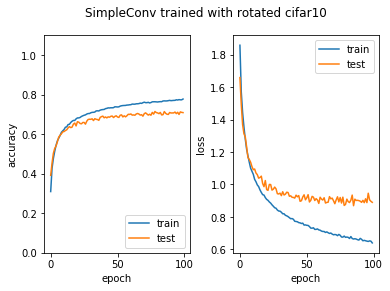

Testing both models on both datasets...


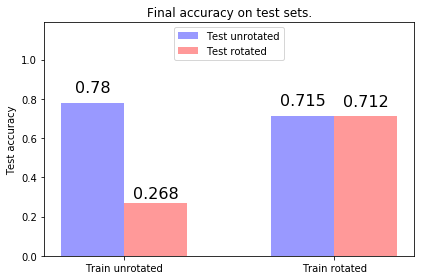

model_rotated_test_dataset score: loss=3.976834, accuracy=0.267500
model_rotated_train_dataset score: loss=3.914884, accuracy=0.279100
model_test_dataset score: loss=0.718795, accuracy=0.780300
model_train_dataset score: loss=0.206080, accuracy=0.935100
rotated_model_rotated_test_dataset score: loss=0.903764, accuracy=0.712300
rotated_model_rotated_train_dataset score: loss=0.631646, accuracy=0.778280
rotated_model_test_dataset score: loss=0.905622, accuracy=0.714900
rotated_model_train_dataset score: loss=0.659280, accuracy=0.775300


In [40]:
batch_size = 64

epochs={'cifar10':5,'mnist':2,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':50,'mnist_rot':5,'pugeault':15}
from pytorch.experiment import rotation
rotated_epochs={'cifar10':100,'mnist':5,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}

config=pytorch.experiment.rotation.TrainRotatedConfig(batch_size=batch_size,
                   epochs=epochs[dataset.name],rotated_epochs=rotated_epochs[dataset.name],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=rotation.run(config,model,rotated_model,dataset,plot_accuracy=True,save_plots=False)
for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


In [41]:
from pytorch.experiment import invariance
n_rotations=16
rotations=np.linspace(-180,180,n_rotations,endpoint=False)

rotated_invariance_measure,classes=invariance.run(rotated_model,dataset,config,rotations)



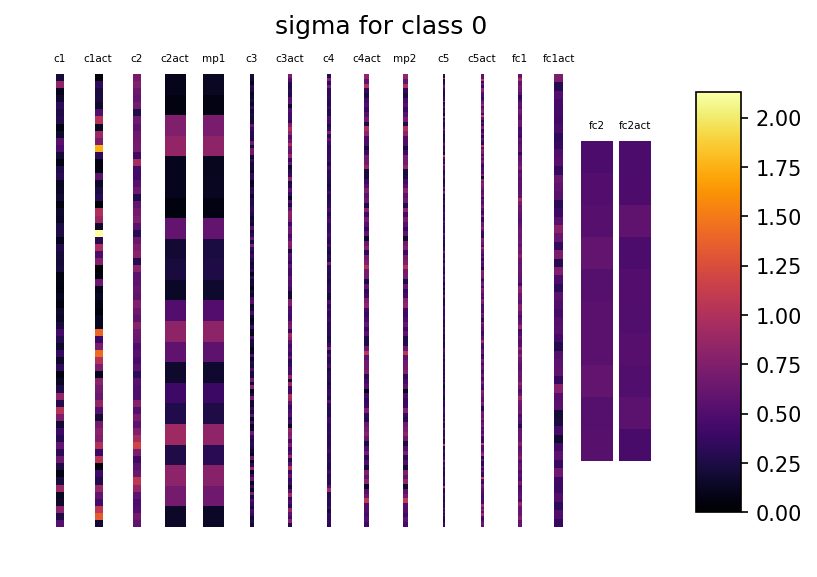

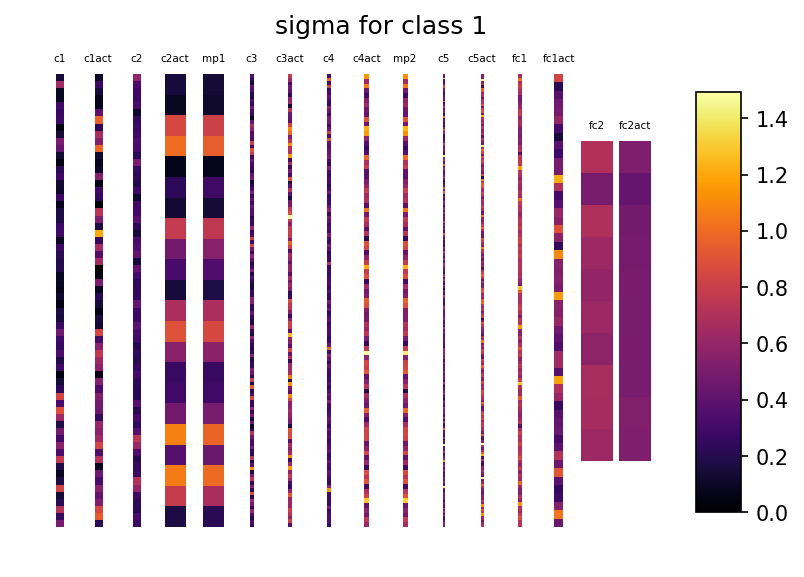

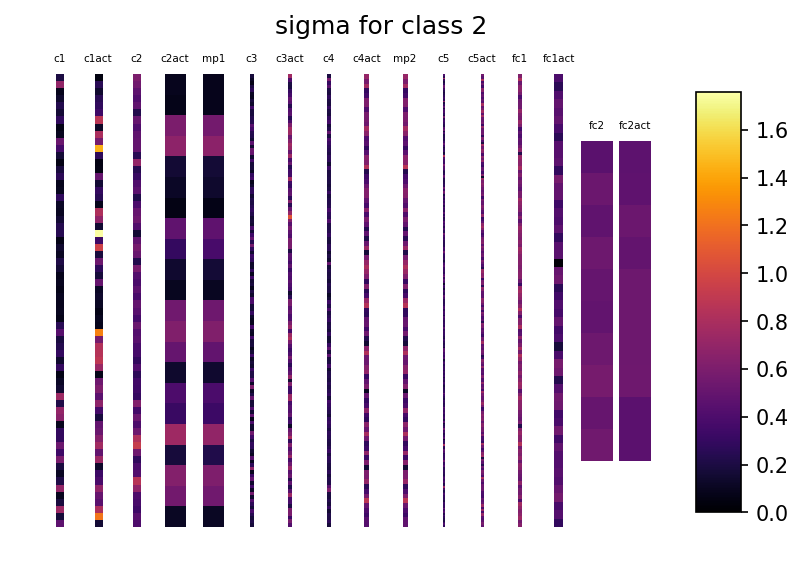

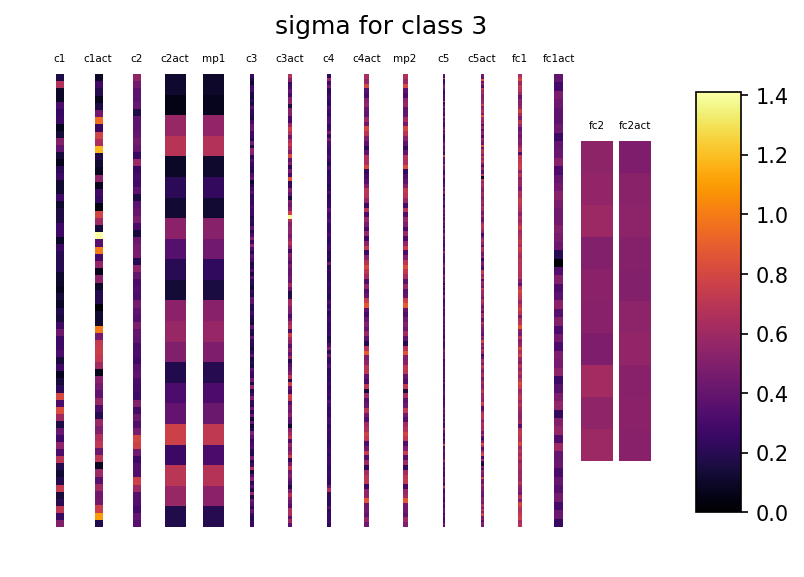

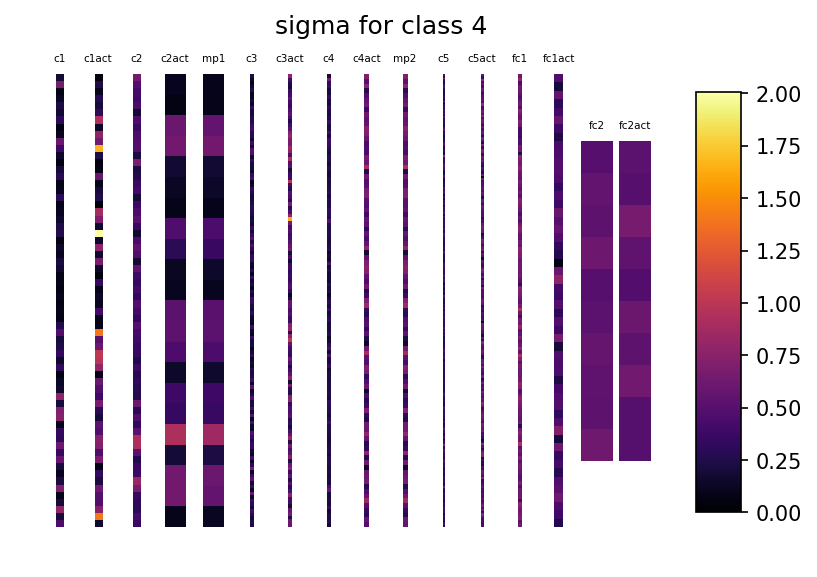

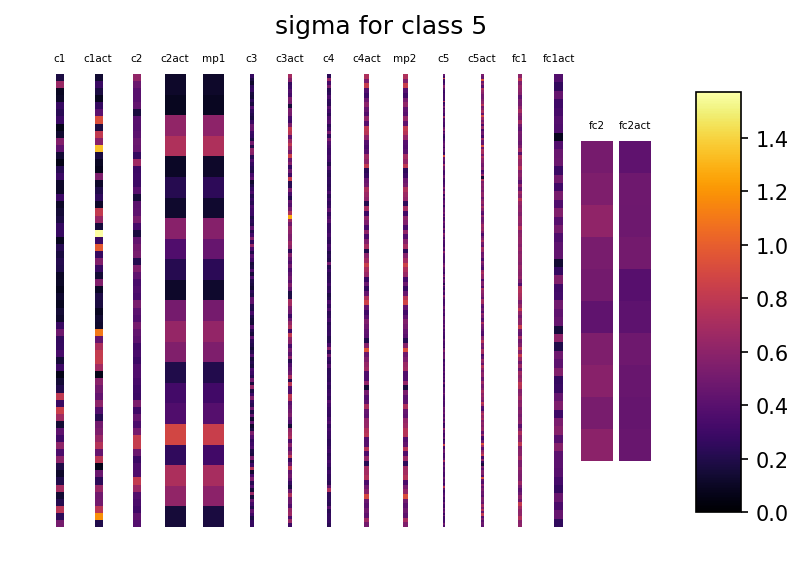

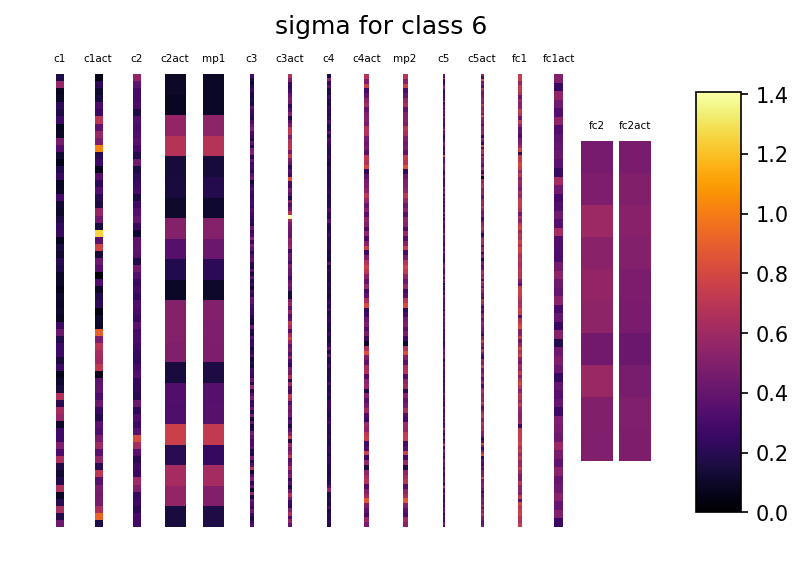

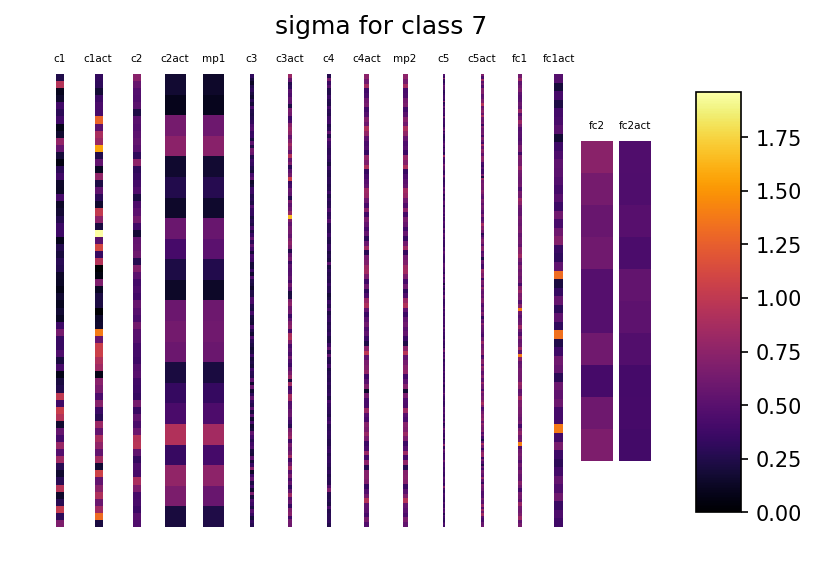

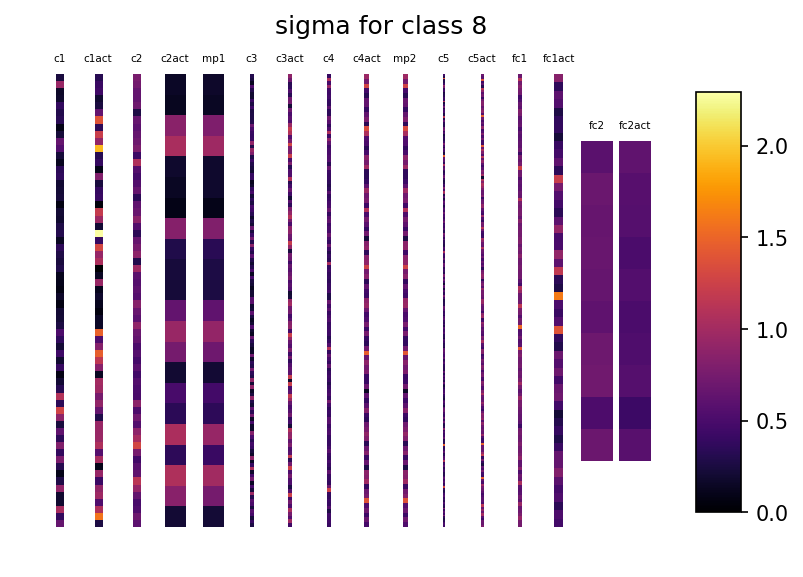

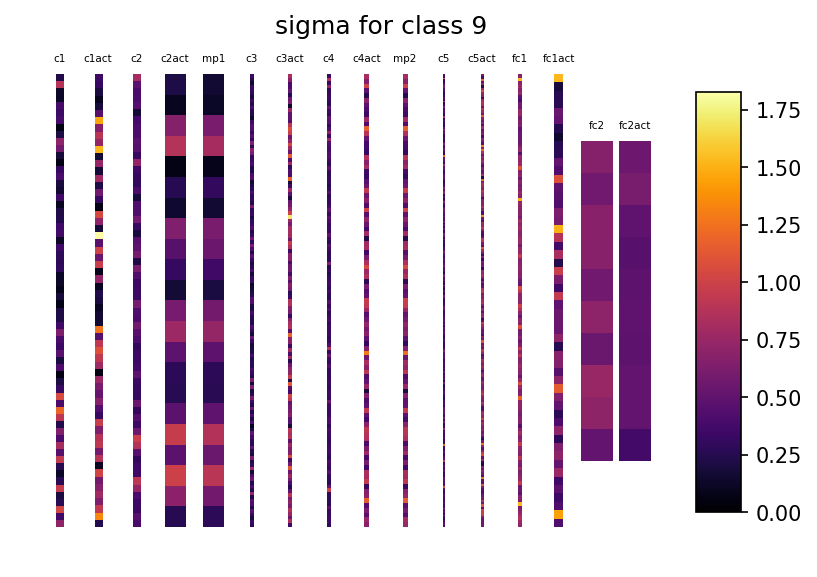

In [42]:
invariance.plot(rotated_invariance_measure,model,dataset.name,classes,savefig=True,savefig_suffix="rotated")



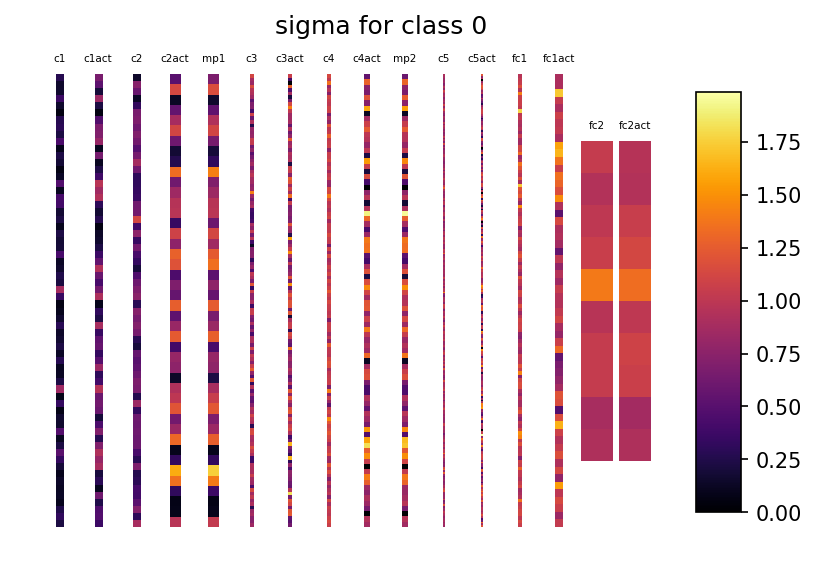

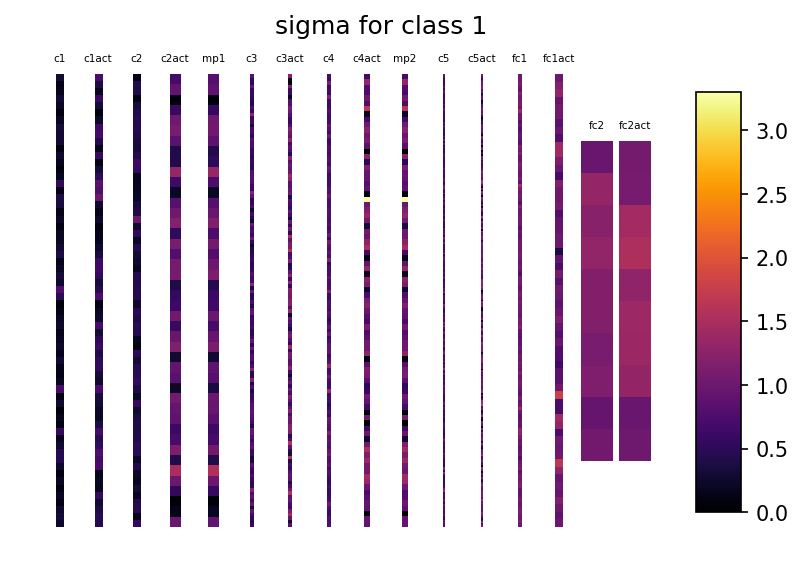

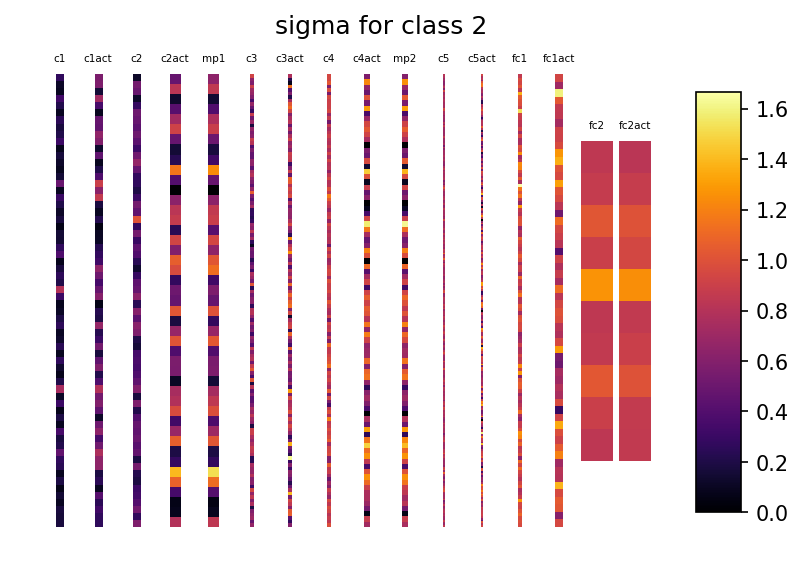

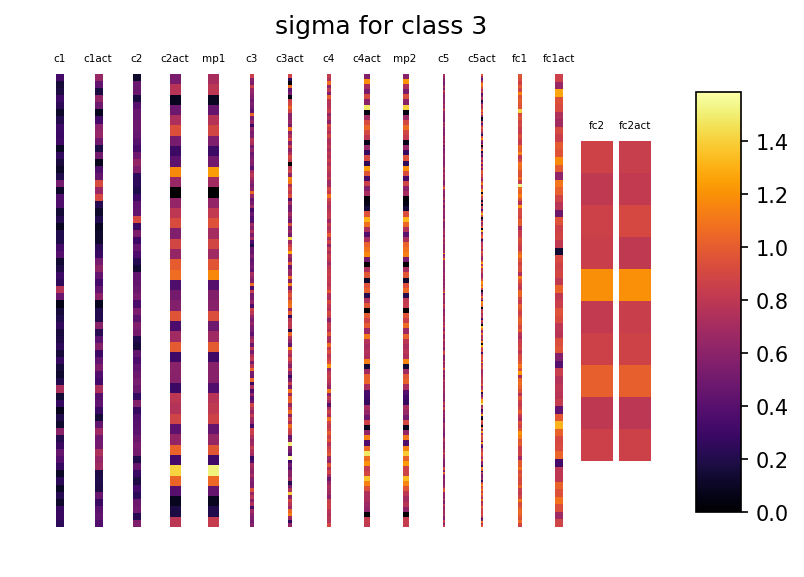

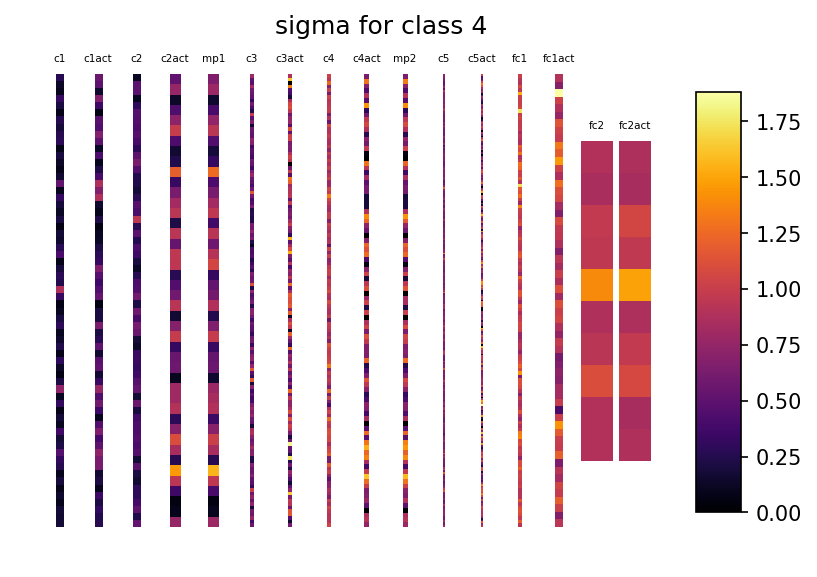

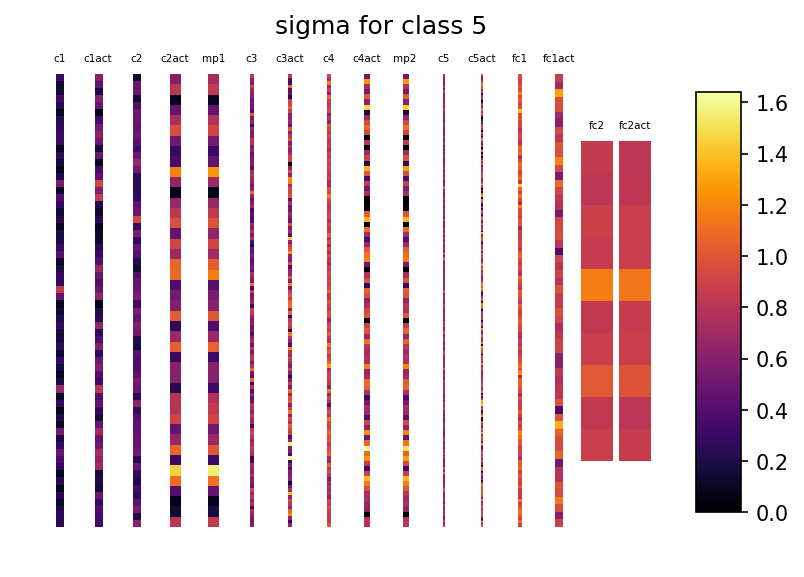

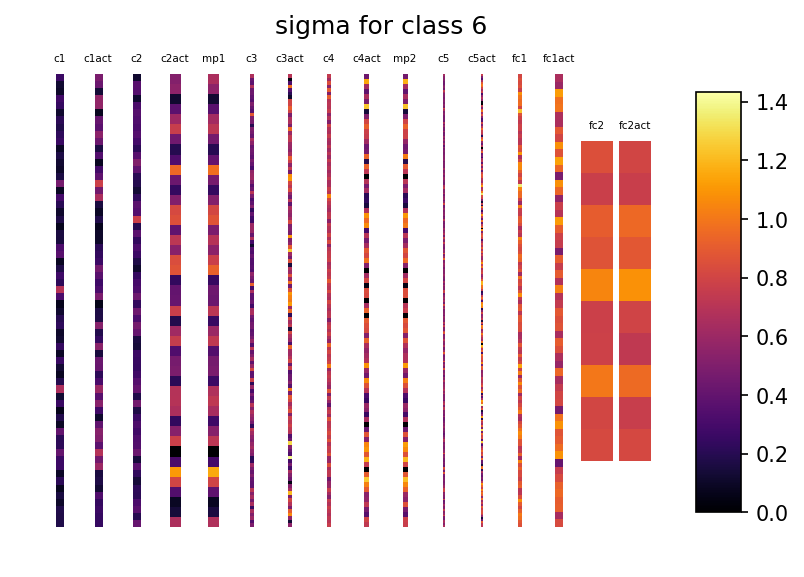

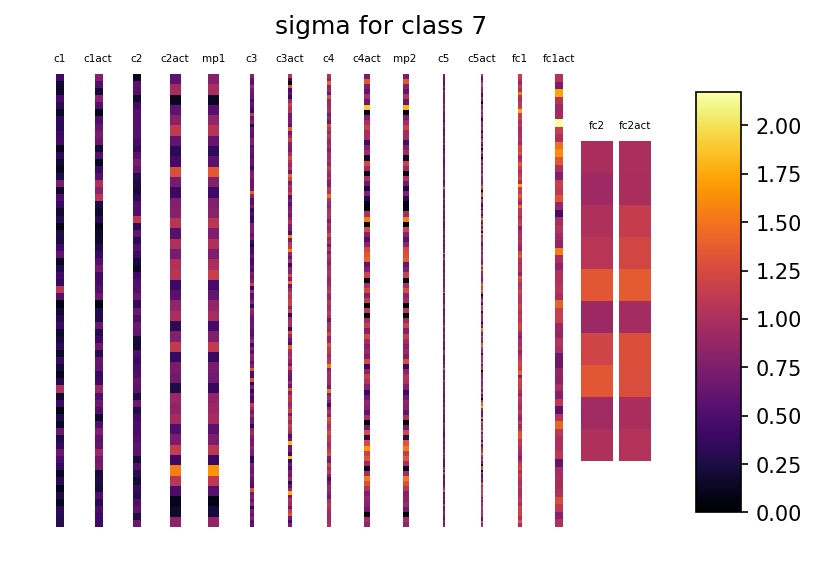

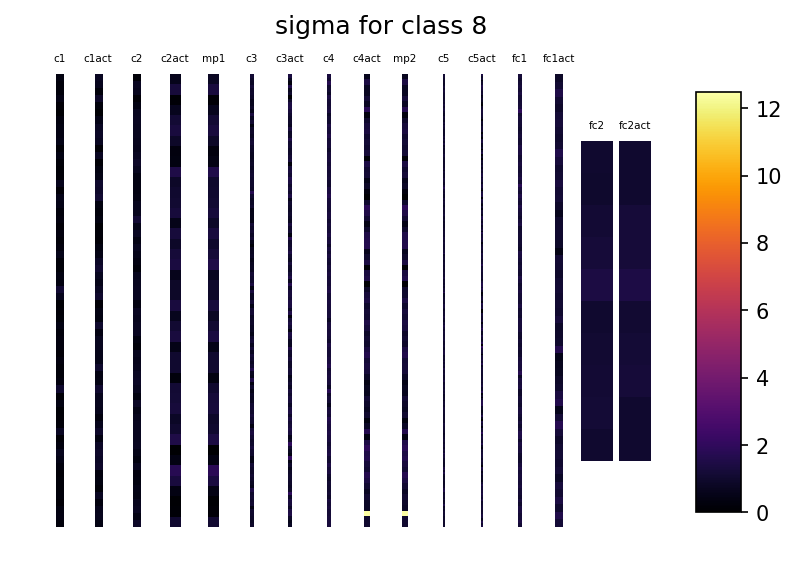

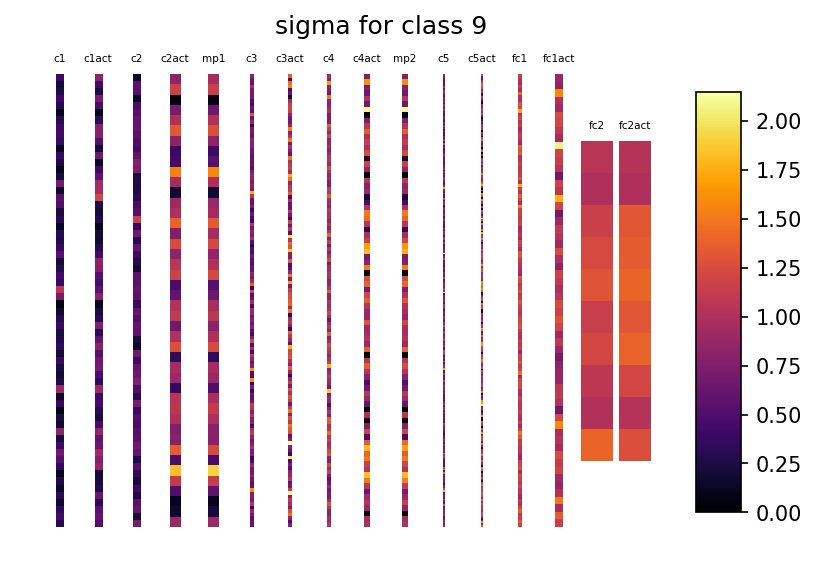

In [43]:
invariance_measure,classes=invariance.run(model,dataset,config,rotations)
invariance.plot(invariance_measure,model,dataset.name,classes,savefig=True,savefig_suffix="unrotated")


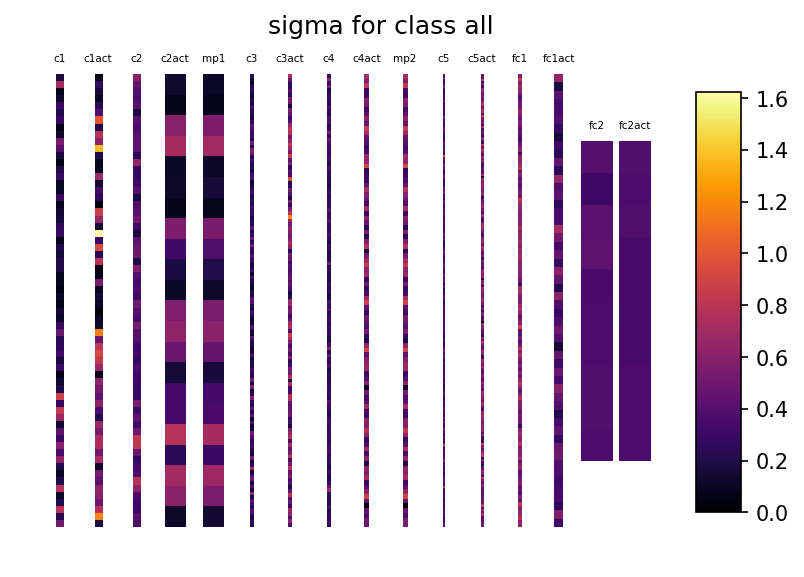

In [44]:
invariance_measure_all_dataset,classes=invariance.run_all_dataset(rotated_model,dataset,config,rotations)
invariance.plot(invariance_measure_all_dataset,rotated_model,dataset.name,classes,savefig=True,savefig_suffix="rotated",class_names=["all"])


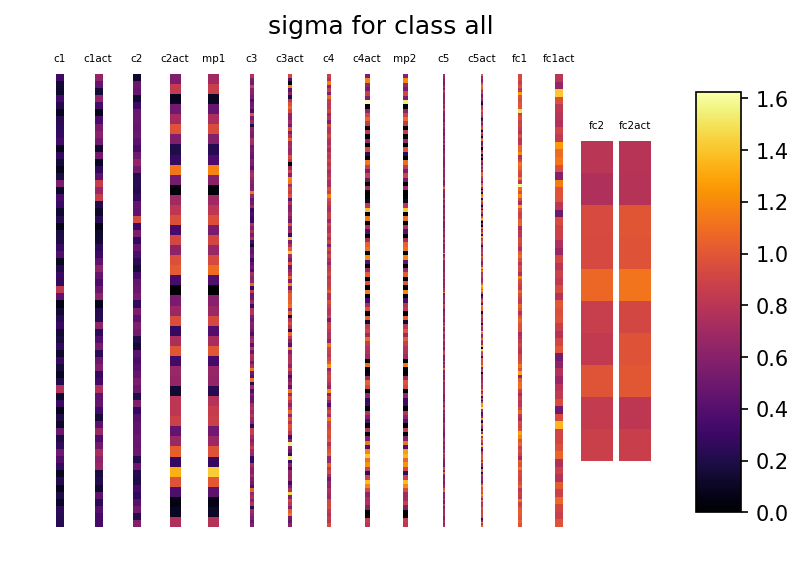

In [45]:
invariance_measure_all_dataset,classes=invariance.run_all_dataset(model,dataset,config,rotations)
invariance.plot(invariance_measure_all_dataset,model,dataset.name,classes,savefig=True,savefig_suffix="unrotated",class_names=["all"])